In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from epg import *
%matplotlib inline
pylab.rcParams['figure.figsize'] = 10, 4


In [70]:
TE = 6e-3
angles = np.loadtxt('/Users/jtamir/Desktop/test_coherence/test6/flipangles.txt')
angles_rad = angles * np.pi / 180.
T = len(angles_rad)

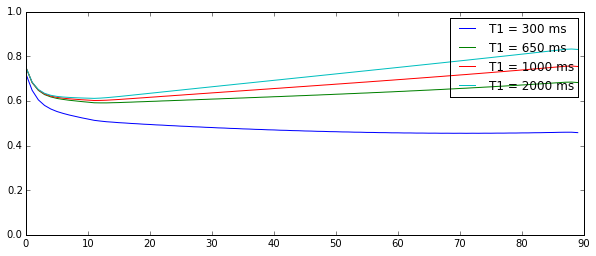

In [71]:
T1vals = np.array([300., 650., 1000., 2000.]) * 1e-3
L = len(T1vals)
T2 = 150e-3

S = np.zeros((T,L), dtype=complex)
for j in range(L):
    T1 = T1vals[j]
    P = np.matrix([[0],[0],[1]])    # initially in M0

    P = epg_rf(P, pi/2, pi/2)[0]    # 90 degree tip

    for i in range(T):
        alpha = angles_rad[i]
        P = epg_relax(P, T1, T2, TE/2.)[0]
        P = epg_grad(P)
        P = epg_rf(P, alpha, 0)[0]
        P = epg_relax(P, T1, T2, TE/2.)[0]
        P = epg_grad(P)

        S[i,j] = P[0,0]
        scale =  (1 + abs(alpha)/(1*pi))
        T2 = T2 * scale
        
plt.plot(range(T), np.abs(S))
plt.ylim((0,1))
plt.legend(['T1 = %d ms' % (1000 * s) for s in T1vals])